In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/ClaimGeniusInc.com/rohan.dhupar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## import necessary package we need

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import numpy as np
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC, SVC
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV ,cross_val_score ,LeaveOneOut
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from nltk import PorterStemmer
from random import shuffle
import scipy

In [21]:
pwd

'/home/ClaimGeniusInc.com/rohan.dhupar/Desktop'

In [99]:
df_train=pd.read_csv("enron_train (1).txt",sep="\t",header=None)
df_test=pd.read_csv("enron_test (1).txt",sep="\t",header=None)

In [100]:
df_train.head()

,0,1
0,No,>>> [1]Contact Me Now to Make $100 Today!$LINK
1,No,Act now to keep your life on the go!
2,No,Choose between $500 and $10000 dollars with up...
3,No,Click above to earn today.
4,No,Click here to receive your first $10 today:


In [101]:
df_train.shape

(3657, 2)

In [102]:
df_train.columns=["target","sentences"]
df_test.columns=["target","sentences"]


In [103]:
df_train.head()

,target,sentences
0,No,>>> [1]Contact Me Now to Make $100 Today!$LINK
1,No,Act now to keep your life on the go!
2,No,Choose between $500 and $10000 dollars with up...
3,No,Click above to earn today.
4,No,Click here to receive your first $10 today:


## basic cleaning seprating target and sentence from both files

In [104]:
df_train["target"].value_counts()

No     1938
Yes    1719
Name: target, dtype: int64

In [105]:
df_test["target"].value_counts()

No     683
Yes    309
Name: target, dtype: int64

In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 2 columns):
target       3657 non-null object
sentences    3657 non-null object
dtypes: object(2)
memory usage: 57.2+ KB


In [107]:
from nltk.corpus import stopwords
import re
def clean(x):
    x = x.lower()
    x = re.sub('[^\w\s]', '', x)
    stop = stopwords.words('english')
    x = [word for word in x.split() if x not in stop]
    return " ".join(x)

In [108]:
df_train["sentences"]= df_train["sentences"].apply(lambda x: clean(x))
df_test["sentences"]= df_test["sentences"].apply(lambda x: clean(x))

In [109]:
df_train.head()

,target,sentences
0,No,1contact me now to make 100 todaylink
1,No,act now to keep your life on the go
2,No,choose between 500 and 10000 dollars with up t...
3,No,click above to earn today
4,No,click here to receive your first 10 today


In [110]:
df_test.head()

,target,sentences
0,No,i look forward to meeting you and learning abo...
1,No,we look forward to seeing you next week
2,No,a quick question before our meeting
3,No,after sunning and drinking all day we feasted ...
4,No,also tuesday kyle and eric 12 hour


## checking the balance of No and Yes in test and train

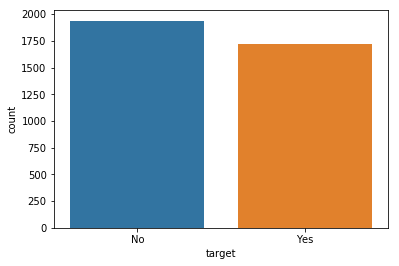

In [111]:
sns.countplot(df_train_final["target"])

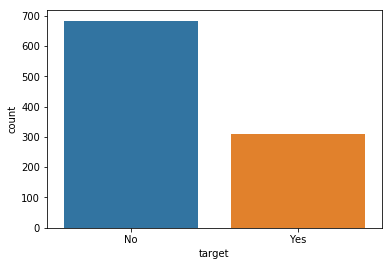

In [112]:
sns.countplot(df_test_final["target"])

## let's see world cloud representation of No and Yes targets

In [155]:
! pip install wordcloud

    100% |████████████████████████████████| 368kB 244kB/s ta 0:00:01


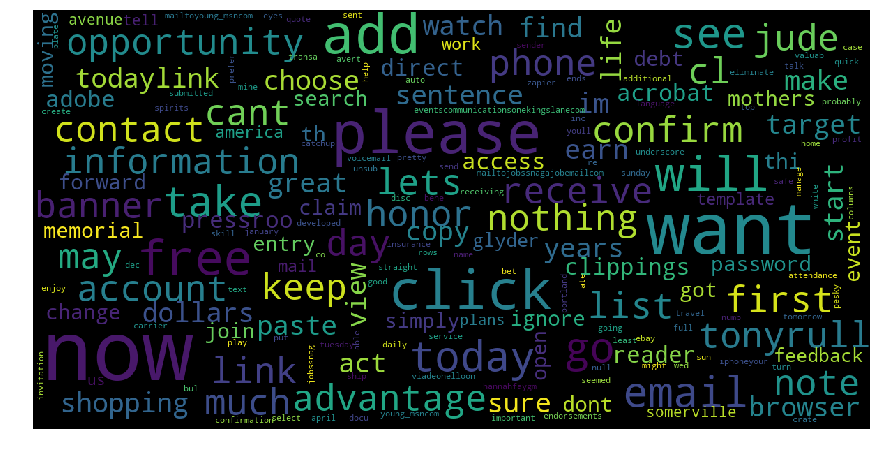

In [156]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df_train_final[df_train_final['target'] == 'No'])

## after seeing this wolrd cloud we can easily observer that all the emails all full of advertisement , click ads
## event , loan offer , product offer , free things , missing opportunity , phone offers 

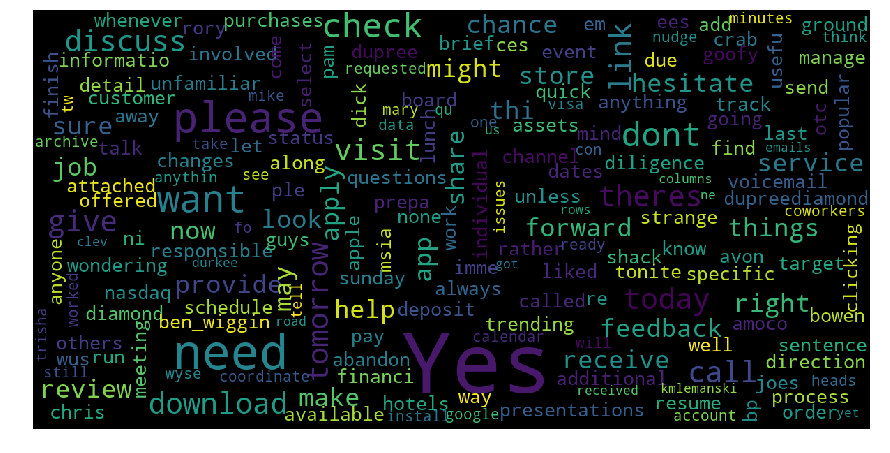

In [157]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df_train_final[df_train_final['target'] == 'Yes'])

## After seeing this positve samples wordcloud  we can see one thing that these emails also contain some abusive words 
## like dick and some conversation like to happen between couple hesitate , product purchase , feedback form , some dicussion happened

In [192]:
from nltk.tokenize import word_tokenize

In [159]:
list_sentences_train = df_train_final["sentence"]
list_sentences_test = df_test_final["sentence"]

In [167]:
list_tokenized_train = word_tokenize(str(list_sentences_train))
list_tokenized_test = word_tokenize(str(list_sentences_test))

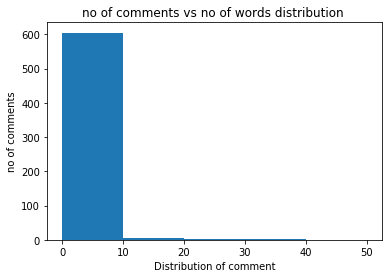

In [172]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]
plt.hist(totalNumWords,bins = np.arange(0,60,10))
plt.xlabel("Distribution of comment")
plt.ylabel("no of comments")
plt.title("no of comments vs no of words distribution ")
plt.show()

## so we can see the word length is not so much kind of one sentence statements ,we can see very few data is in more than length of 10 words , they are like outliers for us 

In [193]:
df_train_final.head()

,sentence,target
0,contact me now to make todaylink,No
1,act now to keep your life on the go,No
2,choose between and dollars with up to years...,No
3,click above to earn today,No
4,click here to receive your first today,No


In [113]:
df_train.shape

(3657, 2)

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df_train.sentences)
X_train_counts.shape

(3657, 6949)

In [123]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3657, 6949)

In [124]:
X_test_counts=count_vect.transform(df_test.sentences)
X_test_tfidf=tfidf_transformer.transform(X_test_counts)

In [117]:
tfidf_transformer

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [151]:
X_test_tfidf.shape

(992, 6949)

In [125]:
target_train=df_train["target"]
target_test=df_test["target"]

In [157]:
target_test=target_test.map({"No":0,"Yes":1})

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
x_train,x_test,y_train,y_test=train_test_split(X_train_tfidf,target_train,test_size=.20,random_state=42)

In [128]:
y_train=y_train.map({"No":0,"Yes":1})
y_test=y_test.map({"No":0,"Yes":1})

## so we tried ensemble algorithms and linear model too we so far get an intution that each other classifier is learning different than other because accuracy of each model is not differing too much very much close to each other for eg 77.8 ,78.55, 79.2 we are getting

## so we will be voting classifier by joinning all the results from different models

In [50]:
from sklearn import svm

In [205]:
def model_svm(x_train,y_train,x_test,y_test,c):
    # combine test and training data for scaling
    acc_score=[]
    cross_score=[]
    error_score=[]
    clf = svm.SVC(C=c,gamma="scale",kernel='linear').fit(x_train,y_train)
    predicted = clf.predict(x_test)
    print(classification_report(predicted,y_test))
    print("Accuracy:",accuracy_score(predicted,y_test))
    acc_score.append(accuracy_score(predicted,y_test))
    print("cross_val_score",np.mean(cross_val_score(clf,x_train,y_train,n_jobs=-1,cv=5)))
    cross_score_mean=np.mean(cross_val_score(clf,x_train,y_train,n_jobs=-1,cv=5))
    mean_error = round(1 - cross_score_mean, 5)
    print ("Mean error: {}\n".format(mean_error))
    error_score.append(mean_error)
    return predicted ,acc_score,cross_score_mean,error_score

svm_result,acc_score_svm,cross_score_svm,error_score_svm= model_svm(x_train,y_train,x_test,y_test,0.7)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       431
           1       0.73      0.78      0.75       301

   micro avg       0.79      0.79      0.79       732
   macro avg       0.78      0.79      0.79       732
weighted avg       0.79      0.79      0.79       732

Accuracy: 0.7909836065573771
cross_val_score 0.7743631401714997
Mean error: 0.22564



In [207]:
def model_rf(x_train,y_train,x_test,y_test,trees):
    # combine test and training data for scaling
    acc_score=[]
    cross_score=[]
    error_score=[]
    clf = RandomForestClassifier(n_estimators=trees,max_depth=74,max_features="auto",n_jobs=-1).fit(x_train,y_train)
    predicted = clf.predict(x_test)
    print(classification_report(predicted,y_test))
    print("Accuracy:",accuracy_score(predicted,y_test))
    acc_score.append(accuracy_score(predicted,y_test))
    print("cross_val_score",np.mean(cross_val_score(clf,x_train,y_train,n_jobs=-1,cv=5)))
    cross_score_mean=np.mean(cross_val_score(clf,x_train,y_train,n_jobs=-1,cv=5))
    mean_error = round(1 - cross_score_mean, 5)
    print ("Mean error: {}\n".format(mean_error))
    error_score.append(mean_error)
    return predicted ,acc_score,cross_score_mean,error_score

rf_result,acc_score_rf,cross_score_rf,error_score_rf= model_rf(x_train,y_train,x_test,y_test,trees=500)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       418
           1       0.74      0.76      0.75       314

   micro avg       0.78      0.78      0.78       732
   macro avg       0.78      0.78      0.78       732
weighted avg       0.78      0.78      0.78       732

Accuracy: 0.7841530054644809
cross_val_score 0.7911147214819663
Mean error: 0.21025



In [208]:
def model_xg(x_train,y_train,x_test,y_test,trees):
    # combine test and training data for scaling
    acc_score=[]
    cross_score=[]
    error_score=[]
    clf = XGBClassifier(n_estimators=trees,learning_rate=0.3,max_features="auto",n_jobs=-1,verbosity=1,
                       ).fit(x_train,y_train)
    predicted = clf.predict(x_test)
    print(classification_report(predicted,y_test))
    print("Accuracy:",accuracy_score(predicted,y_test))
    acc_score.append(accuracy_score(predicted,y_test))
    print("cross_val_score",np.mean(cross_val_score(clf,x_train,y_train,n_jobs=-1,cv=5)))
    cross_score_mean=np.mean(cross_val_score(clf,x_train,y_train,n_jobs=-1,cv=5))
    mean_error = round(1 - cross_score_mean, 5)
    print ("Mean error: {}\n".format(mean_error))
    error_score.append(mean_error)
    return predicted ,acc_score,cross_score_mean,error_score

xg_result,acc_score_xg,cross_score_xg,error_score_xg= model_xg(x_train,y_train,x_test,y_test,trees=240)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       408
           1       0.77      0.77      0.77       324

   micro avg       0.80      0.80      0.80       732
   macro avg       0.79      0.79      0.79       732
weighted avg       0.79      0.80      0.80       732

Accuracy: 0.7950819672131147
cross_val_score 0.7842782714815069
Mean error: 0.21572



In [79]:
! pip install lightgbm

    100% |████████████████████████████████| 1.2MB 757kB/s ta 0:00:01


In [138]:
from lightgbm import LGBMClassifier

In [209]:
def model_lgbm(x_train,y_train,x_test,y_test,trees):
    # combine test and training data for scaling
    acc_score=[]
    cross_score=[]
    error_score=[]
    clf = LGBMClassifier(n_estimators=trees,learning_rate=0.3,max_depth=50,max_features="auto",n_jobs=-1,verbosity=1,
                       ).fit(x_train,y_train)
    predicted = clf.predict(x_test)
    print(classification_report(predicted,y_test))
    print("Accuracy:",accuracy_score(predicted,y_test))
    acc_score.append(accuracy_score(predicted,y_test))
    print("cross_val_score",np.mean(cross_val_score(clf,x_train,y_train,n_jobs=-1,cv=5)))
    cross_score_mean=np.mean(cross_val_score(clf,x_train,y_train,n_jobs=-1,cv=5))
    mean_error = round(1 - cross_score_mean, 5)
    print ("Mean error: {}\n".format(mean_error))
    error_score.append(mean_error)
    return predicted ,acc_score,cross_score_mean,error_score

lgbm_result,acc_score_lg,cross_score_lg,error_score_lg= model_xg(x_train,y_train,x_test,y_test,trees=400)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       413
           1       0.77      0.77      0.77       319

   micro avg       0.80      0.80      0.80       732
   macro avg       0.80      0.80      0.80       732
weighted avg       0.80      0.80      0.80       732

Accuracy: 0.7991803278688525
cross_val_score 0.779148298130719
Mean error: 0.22085



## going forward with dimnestion reduction also see what we can do , this time we are focusing for n-grams too

In [29]:
# features.shape

(3657, 26322)

In [146]:
from sklearn.manifold import TSNE
import time
time_start = time.time()


## We can also use dimensionality reduction techniques, such as PCA or t-SNE to project our high dimensional tf-idf features into a 2D plane, where they can be visualized. This is done by finding a projection that minimizes the information lost (PCA) or keeps nearby points in the high-dimensional space close to each other in the projected space (t-SNE). Below is the result of clustering a third of the articles in our dataset using t-SNE:

In [150]:
# time_start = time.time()
# tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=200)
# tsne_results = tsne.fit_transform(x_train)
# print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [214]:
tsne_df=pd.DataFrame(data=tsne_results)

In [215]:
tsne_df["class_name"]=df_train_final["target"]

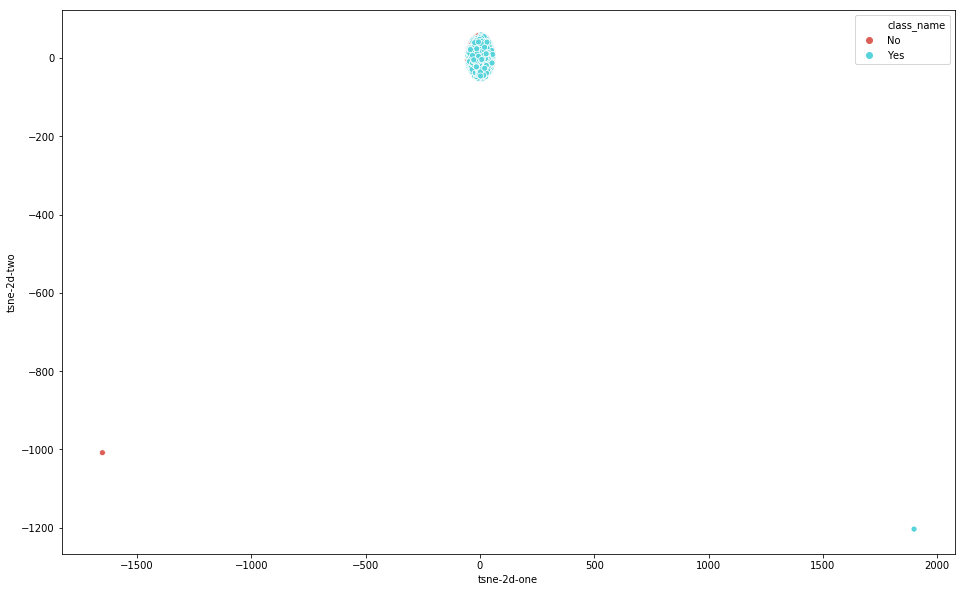

In [217]:
tsne_df['tsne-2d-one'] = tsne_results[:,0]
tsne_df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="class_name",
    palette=sns.color_palette("hls",2),
    data=tsne_df,
    legend="full",
    alpha=1.0
)

## removing outliers

In [231]:
# df1 = pd.DataFrame()

df1['tsne_2d_one'] = tsne_results[:,0]
df1['tsne_2d_two'] = tsne_results[:,1]
df1['tsne_2d_three'] = tsne_results[:,2]

df1['class_labels'] = target_train

df1['class_labels'] = df1['class_labels'].map({'No': 0,'Yes': 1})

In [219]:
# Calculate Range (Min Max)
print("tsne_2d_one = ", df1.tsne_2d_one.min(), "to", df1.tsne_2d_one.max()) 
print("tsne_2d_two = ", df1.tsne_2d_two.min() , "to", df1.tsne_2d_two.max()) 
#print("tsne_2d_three = ", df1.tsne_2d_three.min() , "to", df1.tsne_2d_three.max() )


tsne_2d_one =  -1651.838 to 1899.2543
tsne_2d_two =  -1203.328 to 58.708958


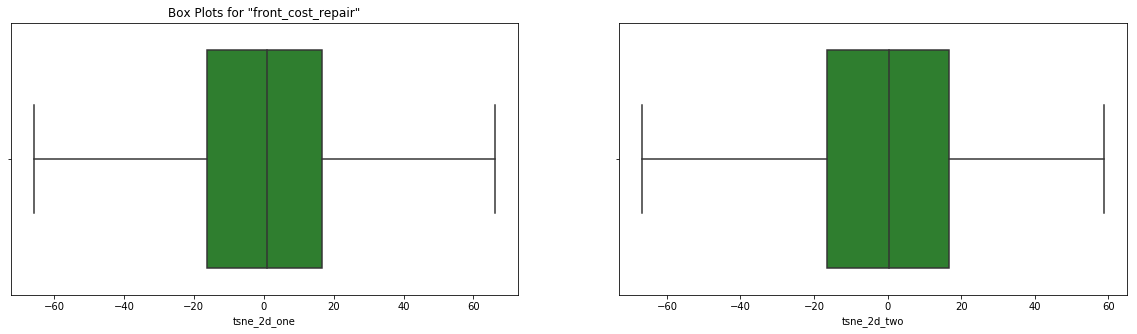

In [227]:
# Box Plot

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
ax1.set_title('Box Plots for "front_cost_repair"' )
sns.boxplot(df1['tsne_2d_one'], ax=ax1 , color='forestgreen')
sns.boxplot(df1['tsne_2d_two'], ax=ax2 , color='forestgreen')
#sns.boxplot(df1['tsne_2d_three'], ax=ax3 , color='forestgreen')

plt.show()

In [223]:
column_name = 'tsne_2d_two'
# Extracting Quantiles values, IQR and Upper & Lower Bounds from data.
q = df1[column_name].quantile([.25, .75]) # Using quantile function for getting Q1(25%) and Q3(75%) quantile
Q1 = q.iloc[0]
Q3 = q.iloc[1]
IQR = Q3-Q1 # Finding interquartile range (IQR)
LB = Q1 - (1.5 * IQR) # Finding Lower bound
UB = Q3 + (1.5 * IQR) # Finding Upper bound

print('Upper Bound =',UB)
print('Lower Bound =',LB)

Upper Bound = 66.86611461639404
Lower Bound = -66.6366548538208


In [224]:
df1[column_name][df1[column_name]>UB] = UB
df1[column_name][df1[column_name]<LB] = LB

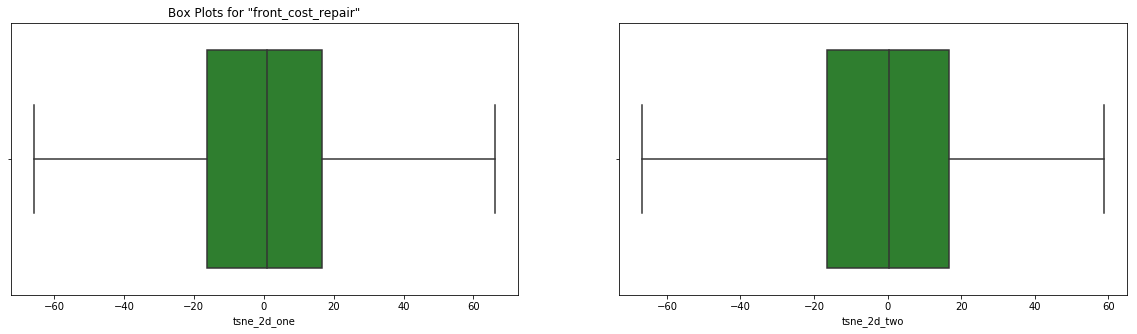

In [228]:
# Box Plot

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
ax1.set_title('Box Plots for "front_cost_repair"' )
sns.boxplot(df1['tsne_2d_one'], ax=ax1 , color='forestgreen')
sns.boxplot(df1['tsne_2d_two'], ax=ax2 , color='forestgreen')
#sns.boxplot(df1['tsne_2d_three'], ax=ax3 , color='forestgreen')

plt.show()

In [233]:
df1.head()

,tsne_2d_one,tsne_2d_two,tsne-2d-one,tsne-2d-two,class_labels
0,26.945076,-5.609917,26.945076,-5.609917,0
1,-3.197597,-48.343872,-3.197597,-48.343872,0
2,13.627497,15.396347,13.627497,15.396347,0
3,-1.067170,-4.543627,-1.067170,-4.543627,0
4,7.729813,-25.625887,7.729813,-25.625887,0


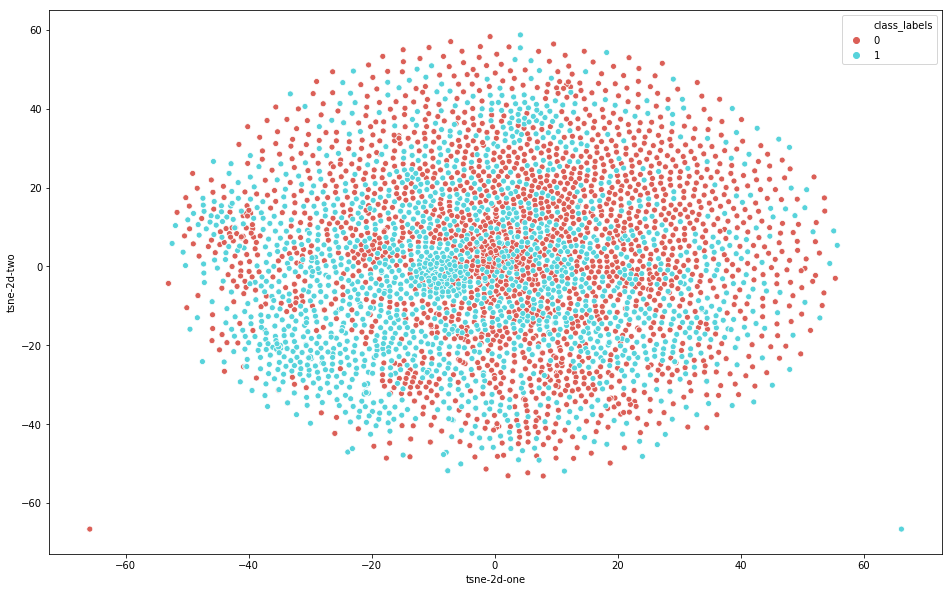

In [234]:
df1['tsne-2d-one'] = df1["tsne_2d_one"]
df1['tsne-2d-two'] = df1["tsne_2d_two"]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="class_labels",
    palette=sns.color_palette("hls",2),
    data=df1,
    legend="full",
    alpha=1.0
)

## As we can see in this TSNE GRAPH that 0 classes are much mixed with 1 class , so with current amount of data it is really tuff problem to classify because data points are not well seprable , so sooner or later we need deep learning solutions to classify this problem or more data we need elsewhere

## let's how many principal components we can explain our dataset fully use that as for our modelling 

In [30]:
import gc
gc.collect()


0

In [45]:
# pca=PCA(n_components=3500)
# pca_full=pca.fit_transform(features)


Text(0, 0.5, 'Cumulative explained variance')

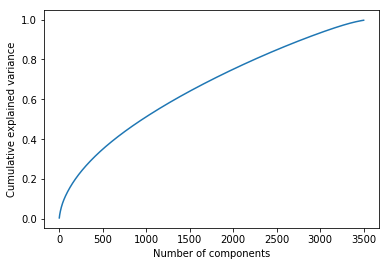

In [32]:
# plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')

## so we can see in 3500 features whole data is explainable let's use PCA then

In [46]:
#x_train,x_test,y_train,y_test=train_test_split(pca_full,target_train,test_size=.20,random_state=42)

In [ ]:
#rf_result,acc_score,cross_score,error_score= model_rf(x_train,y_train,x_test,y_test,trees=500)

              precision    recall  f1-score   support

          No       0.68      0.68      0.68       411
         Yes       0.59      0.59      0.59       321

   micro avg       0.64      0.64      0.64       732
   macro avg       0.63      0.63      0.63       732
weighted avg       0.64      0.64      0.64       732

Accuracy: 0.6379781420765027


## so we found that pca is not giving us result's droping the idea of it , restarting kernel from here 

In [56]:
df_test_final.shape

(992, 2)

## we need votes , voting classifier

In [178]:
preds = pd.DataFrame()

In [180]:
clf = RandomForestClassifier(n_estimators=300,max_depth=74,max_features="auto",n_jobs=-1
                       ).fit(x_train,y_train)
preds["Model1"] = clf.predict(X_test_tfidf)

In [181]:
clf = XGBClassifier(n_estimators=240,learning_rate=0.3,max_features="auto",n_jobs=-1,verbosity=1,
                       ).fit(x_train,y_train)
preds["Model2"] = clf.predict(X_test_tfidf)

## score of random forest is 82.05 after building hybrid classfier score increased by how much let's see

In [271]:
accuracy_score(preds["Model1"],target_test)

0.8205645161290323

In [182]:
clf = svm.SVC(C=0.7,gamma="scale",kernel='linear').fit(x_train,y_train)
preds["Mode3"] = clf.predict(X_test_tfidf)

In [183]:
clf = LGBMClassifier(n_estimators=400,learning_rate=0.3,max_depth=50,max_features="auto",n_jobs=-1,verbosity=1,
                       ).fit(x_train,y_train)
preds["Model4"] = clf.predict(X_test_tfidf)

In [190]:
preds

,Model1,Model2,Mode3,Model4
0,0,0,0,0
1,0,0,0,0
2,0,0,1,0
3,0,0,0,0
4,0,0,0,0
5,1,1,1,1
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,1,1,1,1


In [185]:
pred = preds.mode(axis=1)

In [278]:
print(classification_report(pred[0],target_test))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       667
         1.0       0.74      0.71      0.73       325

   micro avg       0.82      0.82      0.82       992
   macro avg       0.80      0.79      0.80       992
weighted avg       0.82      0.82      0.82       992



In [276]:
print(accuracy_score(pred[0],target_test))

0.8245967741935484


## hike of 0.004 percent increace that is from 0.8205 to 0.8245

## Final accuracy on test set is 82.45 percent , let we take auc_score to see how much 0 are going in 1 classes vice and versa

In [265]:
from sklearn.metrics import roc_auc_score

In [274]:
print(roc_auc_score(pred[0],target_test))

0.7946257640410564


## so we can say that 79.46 percentage of area (test data) we are classfying things correctly

## model analysis

In [195]:
metric=pd.DataFrame()

In [211]:
metric["accuracy"]=acc_score_svm[0],acc_score_xg[0],acc_score_rf[0],acc_score_lg[0]
metric["cross_val_score"]=cross_score_svm,cross_score_xg,cross_score_rf,cross_score_lg
metric["error_score"]=error_score_svm[0],error_score_xg[0],error_score_rf[0],error_score_lg[0]

In [214]:
metric["model"]=["svm","random_forest","xg_boost","lightgbm"]

In [293]:
metric=metric.round(2)

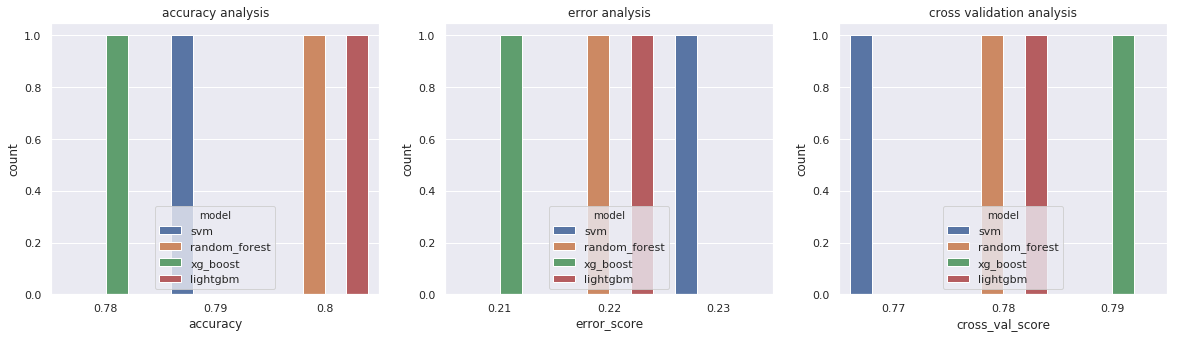

In [295]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(20, 5))
ax1.set_title('accuracy analysis')
sns.countplot(x='accuracy', ax=ax1 , hue="model",data=metric)
ax2.set_title("error analysis")
sns.countplot(x='error_score', ax=ax2 ,hue="model",data=metric)
ax3.set_title("cross validation analysis")
sns.countplot(x='cross_val_score', ax=ax3 ,hue="model",data=metric)

## The best result is giving us by Random forest in this enron intent classification challenge

## There are two main reasons why  Random Forests over Gradient Boosted Decision is working for us and they are both pretty related:

## RF are much easier to tune than GBM
##  RF are harder to overfit than GBM

## Related to (1), RF basically has only one hyperparameter to set: the number of features to randomly select at each node. However there is a rule-of-thumb to use the square root of the number of total features which works pretty well in most cases(1). On the other hand, GBMs have several hyperparameters that include the number of trees, the depth (or number of leaves), and the shrinkage (or learning rate).

## And, regarding (2), while it is not true that RF do not overfit (as opposed as many are led to believe by Breiman's strong assertions(2)), it is true that they are more robust to overfitting and require less tuning to avoid it.

## In some sense, RF is a tree ensemble that is more "plug'n'play" than GBM. However, it is generally true that a well-tuned GBM can outperform a RF.

## Also, as Tianqi Chen mentioned, RF has traditionally been easier to parallelism. However, that is not a good reason anymore given there are efficient ways to do it with GBMs also.